In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

import numpy as np
import matplotlib.pyplot as plt

## 데이터 생성 함수

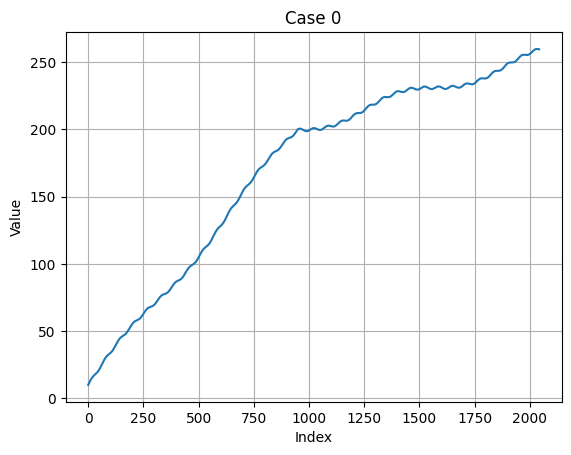

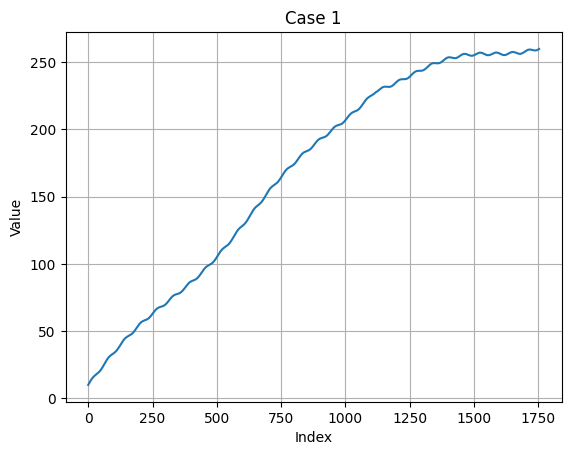

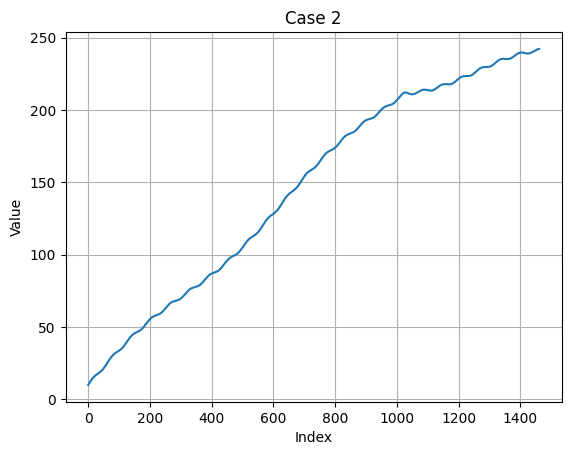

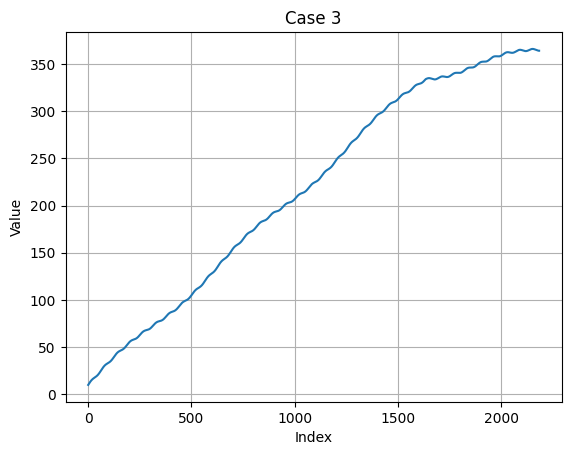

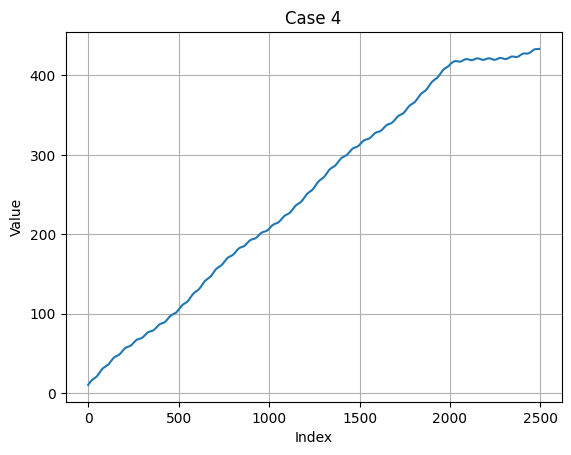

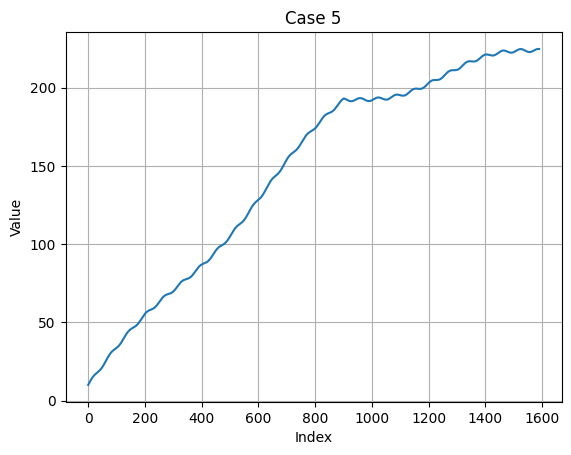

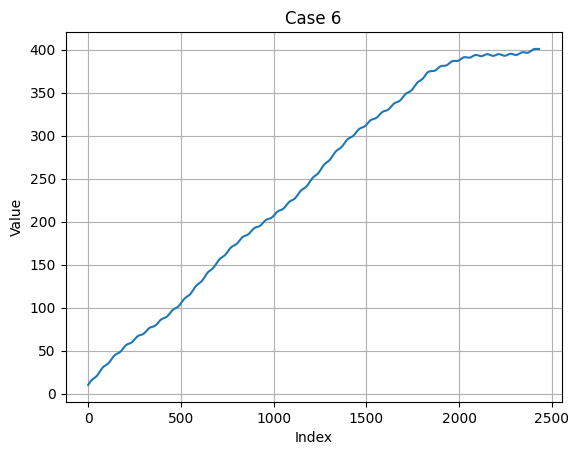

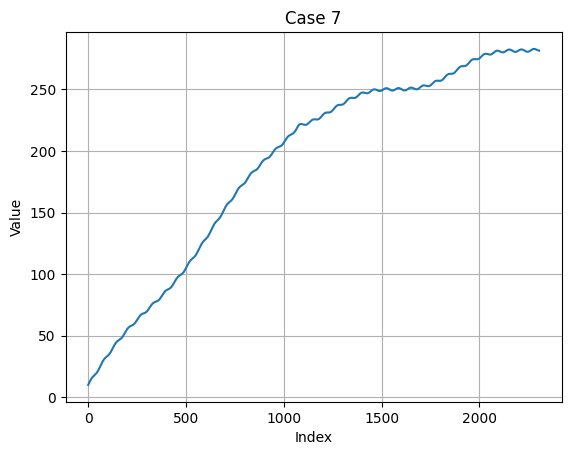

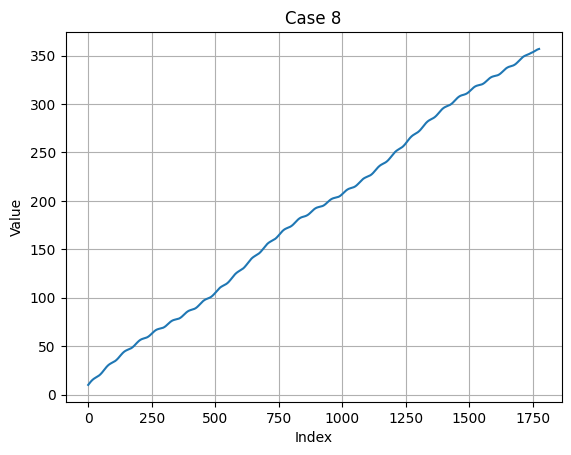

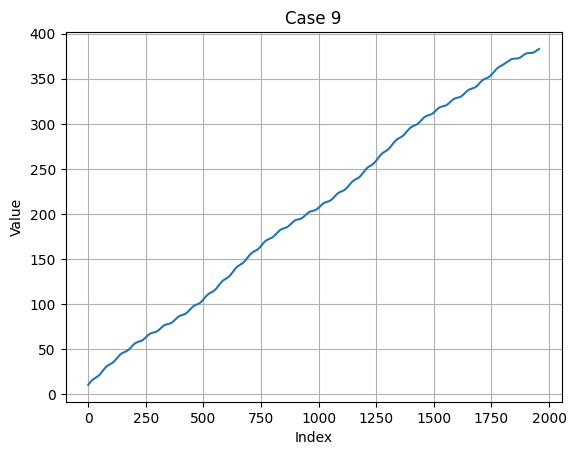

In [10]:
# 데이터 생성 함수
def generate_dataset(size, start_index, end_index, inflection_point):
    x = np.linspace(start_index, end_index, size)
    y = np.sin(0.1 * x) + 0.2 * x + 10  #기본적인 형태의 함수에 사인 함수를 더해줌

    # 특정 지점에서의 감소 추가 (항복점 역할)
    decrease_mask = x > inflection_point
    y[decrease_mask] -= 0.1 * (x[decrease_mask] - inflection_point)  # 특정 지점 이후에서의 초기 감소

    # 특정 지점 이후의 감소율을 높여서 더욱 완만하게 만든다
    decrease_factor = 0.5
    y[decrease_mask] -= decrease_factor * 0.1 * (x[decrease_mask] - inflection_point)

    # 노이즈 추가 (주파수 낮추기)
    noise_frequency = 0.01  # 주파수 낮추기
    noise = 5 * np.sin(noise_frequency * x)  # 사인 함수를 사용하여 노이즈 생성
    y_with_noise = y + noise

    return x, y_with_noise

# N개 데이터셋 생성
num_cases = 10
for i in range(num_cases):
    dataset_size = end_index
    start_index = 0
    end_index = np.random.randint(1400, 2500)  
    inflection_point = np.random.randint(start_index+700, end_index)

    x, y_with_noise = generate_dataset(dataset_size, start_index, end_index, inflection_point)
    
    # 그래프 그리기
    plt.plot(x, y_with_noise)
    plt.title(f'Case {i}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.grid(True)
   
    # plot 이미지로 저장
    # plt.savefig(f'case_{i}_plot.png')
    
    # CSV 파일로 저장
    data = np.column_stack((x, y_with_noise))
    filename = f'case_{i}_raw_data.csv'
    np.savetxt(filename, data, delimiter=',', header='Index,Value', comments='')
    
    #Display the plot
    plt.show()
    plt.close()
